In [21]:
import os
import pickle
from collections import defaultdict

import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
from sgp.GraphUtil import sparse_to_networkx

%matplotlib inline

Properties:
* The number of nodes increases as tau decreases (minimum > 0).
* The number of nodes increases as alpha increases
* Expected number of dense node is : -alpha / sigma * tau ^ sigma

Basic parameter config (sparse alpha, sigma, tau + dense alpha, sigma tau):
* 100, 0.5, 1, 100, -1, 0.1 (generate the largest graph among basic configurations)
* 100, 0.5, 1, 100, -1, 1
* 100, 0.5, 1, 100, -1, 5
* 100, 0.5, 1, 100, -1, 10

Additional parameter configurations
* 100, 0, 1 + 100, -1, 1
* 100, 0.5, 0.1 + 100, -1, 0.1

In [30]:
mdest = '../result/random_network/mixture/'
sdest = '../result/random_network/sparse/'

m_f = '%d_%.2f_%.2f_%.2f_%.2f_%.2f_%.2f.pkl'
s_f = '%d_%.2f_%.2f_%.2f.pkl'

alpha = 100
sigma = 0.5
tau = 1
d_alpha = 100
d_sigma = -1
d_tau = 1

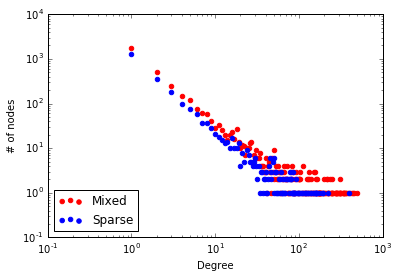

In [31]:
n_sample=1
for i in range(n_sample):
    mfile = os.path.join(mdest, m_f % (i, alpha, sigma, tau, d_alpha, d_sigma, d_tau))
    sfile = os.path.join(sdest, s_f % (i, alpha, sigma, tau))
    
    if os.path.exists(mfile) and os.path.exists(sfile):
        sample = pickle.load(open(mfile, 'rb'))
        G = sparse_to_networkx(sample[0])
        ddict = nx.degree(G)
        ddist = defaultdict(int)
        for k, v in ddict.items():
            ddist[v] += 1

        sample = pickle.load(open(sfile, 'rb'))
        sG = sparse_to_networkx(sample[0])
        sddict = nx.degree(sG)
        sddist = defaultdict(int)
        for k, v in sddict.items():
            sddist[v] += 1

        ax = plt.subplot()
        plt.scatter(list(ddist.keys()), list(ddist.values()), label='Mixed', color='red')
        plt.scatter(list(sddist.keys()), list(sddist.values()), label='Sparse', color='blue')
        ax.set_xscale("log")
        ax.set_yscale("log")
        plt.legend(loc='lower left')
        plt.xlabel('Degree')
        plt.ylabel('# of nodes')
        plt.show()